# Import Statements

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from collections import Counter
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Data Cleaning

In [37]:
data = pd.read_csv("user_profiles_for_ads.csv")

print(data.head())

   User ID    Age  Gender  Location Language Education Level  \
0        1  25-34  Female  Suburban    Hindi       Technical   
1        2    65+    Male     Urban    Hindi             PhD   
2        3  45-54  Female  Suburban  Spanish       Technical   
3        4  35-44  Female     Rural  Spanish             PhD   
4        5  25-34  Female     Urban  English       Technical   

   Likes and Reactions  Followed Accounts  Device Usage  \
0                 5640                190   Mobile Only   
1                 9501                375        Tablet   
2                 4775                187   Mobile Only   
3                 9182                152  Desktop Only   
4                 6848                371   Mobile Only   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5                              1.7   
1                              0.5                              7.7   
2                              4.5             

In [38]:
print(data.isnull().sum())

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64


In [39]:
data.describe()

,User ID,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,4997.084000,251.438000,2.757500,4.601600,0.125333,0.049805,91.425000
std,288.819436,2838.494365,141.941557,1.279735,2.026234,0.071187,0.028670,51.497965
min,1.000000,101.000000,10.000000,0.500000,1.000000,0.000000,0.000000,5.000000
25%,250.750000,2661.250000,126.000000,1.700000,2.900000,0.065000,0.026000,45.750000
50%,500.500000,5002.500000,245.500000,2.800000,4.700000,0.128000,0.049000,90.000000
75%,750.250000,7348.750000,377.000000,3.800000,6.400000,0.186000,0.073000,137.250000
max,1000.000000,9973.000000,498.000000,5.000000,8.000000,0.250000,0.100000,179.000000


# Data Exploration

### Demographic distributions

<ipython-input-40-d26197d33d6d>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-40-d26197d33d6d>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-40-d26197d33d6d>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-40-d26197d33d6d>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-40-d26197d33d6d>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wil

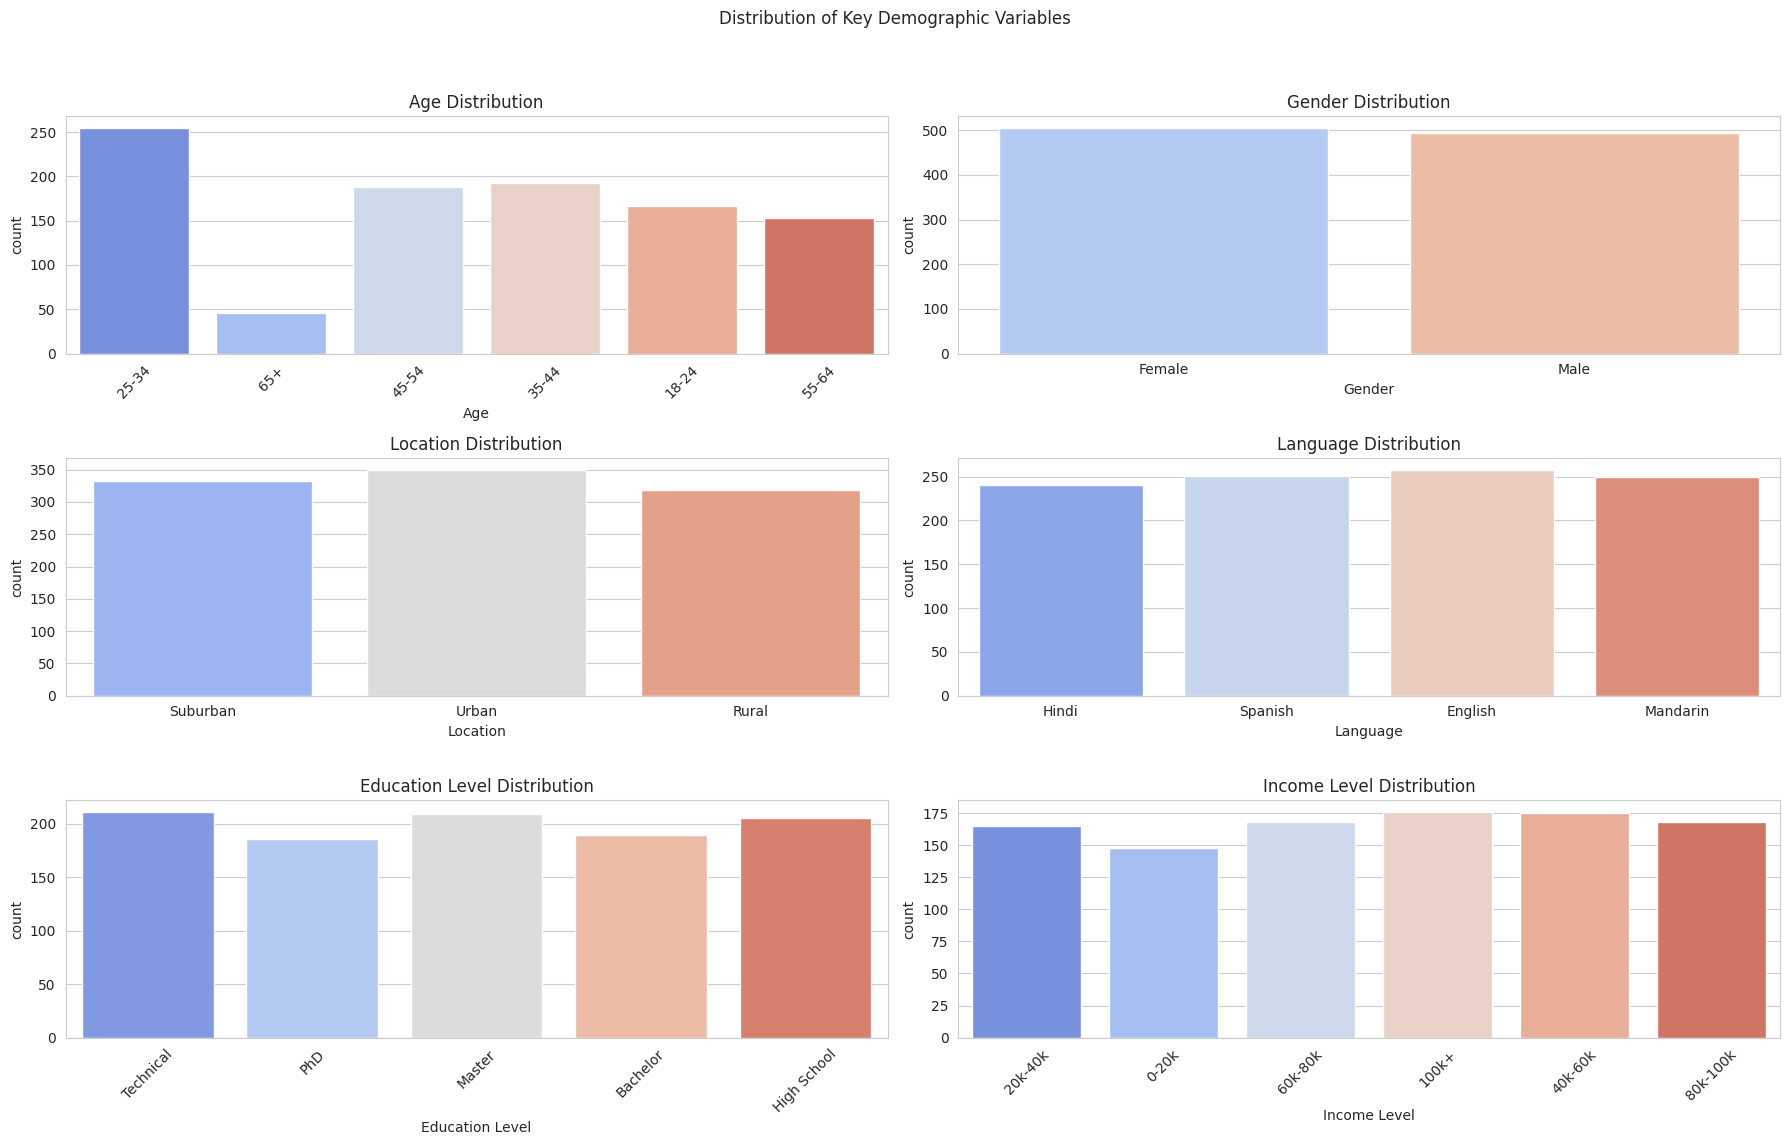

In [40]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
fig.suptitle('Distribution of Key Demographic Variables')

# Age distribution
sns.countplot(ax=axes[0, 0], x='Age', data=data, palette='coolwarm')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].tick_params(axis='x', rotation=45)

# Gender distribution
sns.countplot(ax=axes[0, 1], x='Gender', data=data, palette='coolwarm')
axes[0, 1].set_title('Gender Distribution')

# Location distribution
sns.countplot(ax=axes[1, 0], x='Location', data=data, palette='coolwarm')
axes[1, 0].set_title('Location Distribution')

# Language distribution
sns.countplot(ax=axes[1, 1], x='Language', data=data, palette='coolwarm')
axes[1, 1].set_title('Language Distribution')

# Education level distribution
sns.countplot(ax=axes[2, 0], x='Education Level', data=data, palette='coolwarm')
axes[2, 0].set_title('Education Level Distribution')
axes[2, 0].tick_params(axis='x', rotation=45)

# Income level distribution
sns.countplot(ax=axes[2, 1], x='Income Level', data=data, palette='coolwarm')
axes[2, 1].set_title('Income Level Distribution')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Device usage distribution

<ipython-input-41-a6c22ee47d7f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




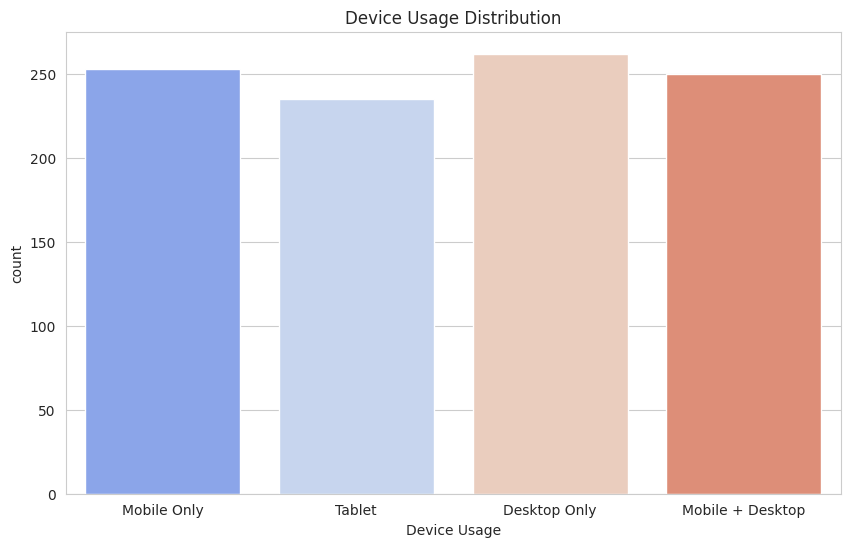

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Device Usage', data=data, palette='coolwarm')
plt.title('Device Usage Distribution')
plt.show()

### User engagement and Ad interaction metrics

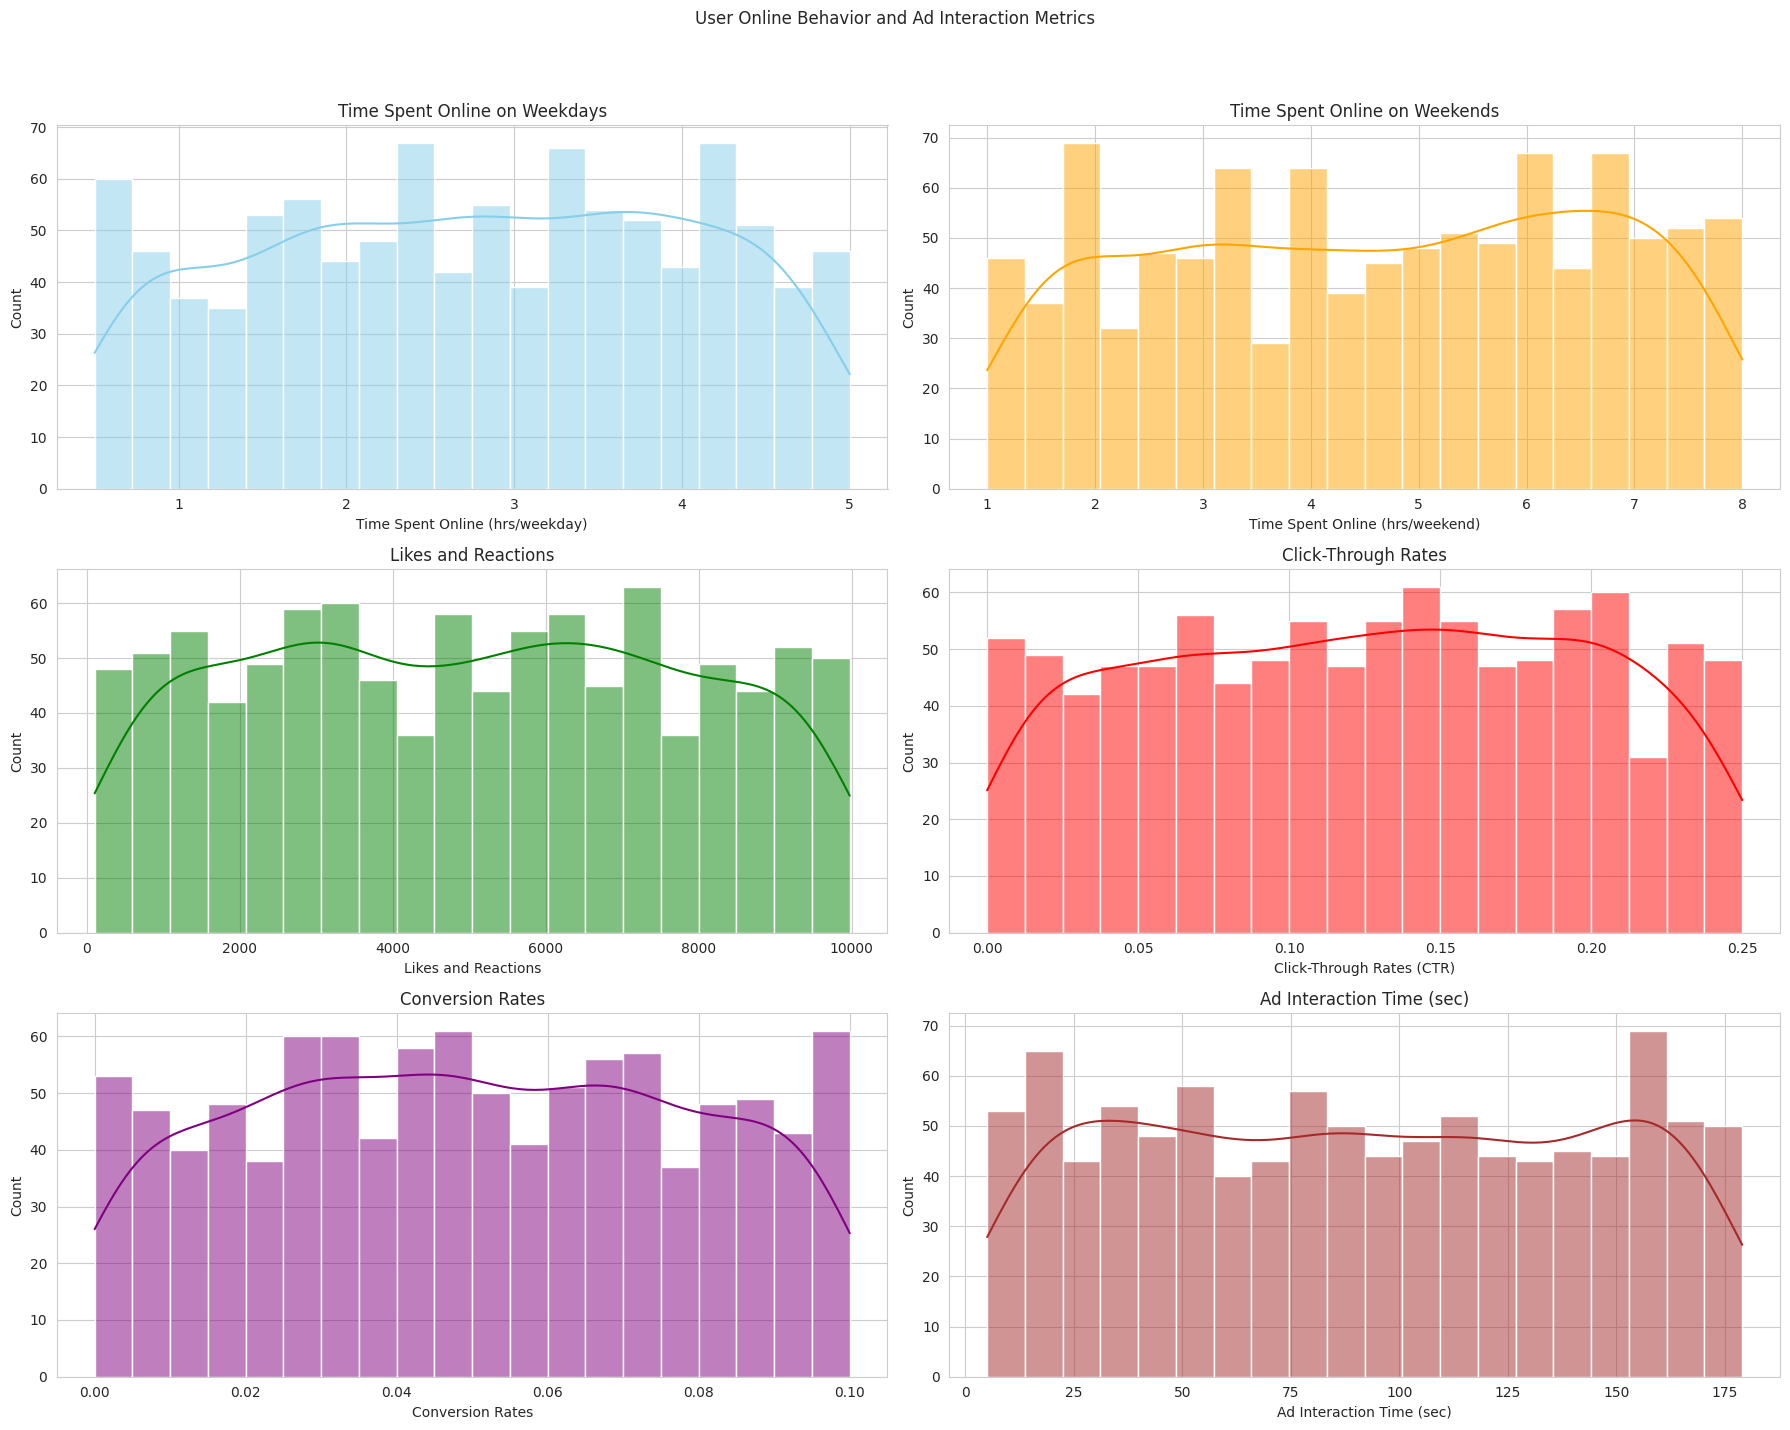

In [42]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('User Online Behavior and Ad Interaction Metrics')

# Time Spent Online on Weekdays
sns.histplot(ax=axes[0, 0], x='Time Spent Online (hrs/weekday)', data=data, bins=20, kde=True, color='skyblue')
axes[0, 0].set_title('Time Spent Online on Weekdays')

# Time Spent Online on Weekends
sns.histplot(ax=axes[0, 1], x='Time Spent Online (hrs/weekend)', data=data, bins=20, kde=True, color='orange')
axes[0, 1].set_title('Time Spent Online on Weekends')

# Likes and Reactions
sns.histplot(ax=axes[1, 0], x='Likes and Reactions', data=data, bins=20, kde=True, color='green')
axes[1, 0].set_title('Likes and Reactions')

# Click-Through Rates
sns.histplot(ax=axes[1, 1], x='Click-Through Rates (CTR)', data=data, bins=20, kde=True, color='red')
axes[1, 1].set_title('Click-Through Rates')

# Conversion Rates
sns.histplot(ax=axes[2, 0], x='Conversion Rates', data=data, bins=20, kde=True, color='purple')
axes[2, 0].set_title('Conversion Rates')

# Ad Interaction Time
sns.histplot(ax=axes[2, 1], x='Ad Interaction Time (sec)', data=data, bins=20, kde=True, color='brown')
axes[2, 1].set_title('Ad Interaction Time (sec)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### User preferences

<ipython-input-43-785ab9c57c0b>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




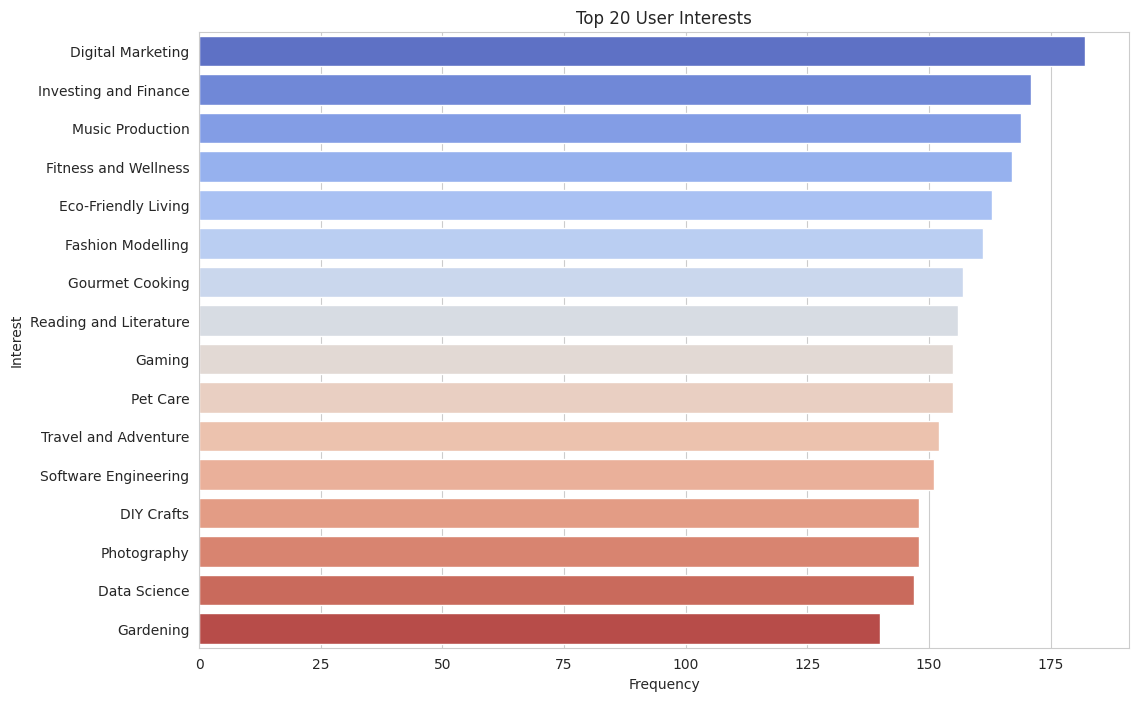

In [43]:
interests_list = data['Top Interests'].str.split(', ').sum()
interests_counter = Counter(interests_list)
interests_df = pd.DataFrame(interests_counter.items(), columns=['Interest', 'Frequency']).sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Interest', data=interests_df.head(20), palette='coolwarm')
plt.title('Top 20 User Interests')
plt.xlabel('Frequency')
plt.ylabel('Interest')
plt.show()

# Clustering

In [44]:
features = ['Age', 'Gender', 'Income Level', 'Time Spent Online (hrs/weekday)',
            'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
X = data[features]

num_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
numeric_transformer = StandardScaler()

cat_features = ['Age', 'Gender', 'Income Level']
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', KMeans(n_clusters=5, random_state=42))])

pipeline.fit(X)
cluster_labels = pipeline.named_steps['cluster'].labels_
data['Cluster'] = cluster_labels

print(data.head())

   User ID    Age  Gender  Location Language Education Level  \
0        1  25-34  Female  Suburban    Hindi       Technical   
1        2    65+    Male     Urban    Hindi             PhD   
2        3  45-54  Female  Suburban  Spanish       Technical   
3        4  35-44  Female     Rural  Spanish             PhD   
4        5  25-34  Female     Urban  English       Technical   

   Likes and Reactions  Followed Accounts  Device Usage  \
0                 5640                190   Mobile Only   
1                 9501                375        Tablet   
2                 4775                187   Mobile Only   
3                 9182                152  Desktop Only   
4                 6848                371   Mobile Only   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5                              1.7   
1                              0.5                              7.7   
2                              4.5             

In [45]:
cluster_means = data.groupby('Cluster')[num_features].mean()

for feature in cat_features:
    mode_series = data.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

print(cluster_means)

         Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
Cluster                                                                     
0                               3.911111                         5.212963   
1                               1.559394                         6.002424   
2                               3.019737                         2.584211   
3                               3.080882                         5.774510   
4                               1.809626                         3.839572   

         Likes and Reactions  Click-Through Rates (CTR)    Age  Gender  \
Cluster                                                                  
0                2409.620370                   0.149588  25-34  Female   
1                5005.121212                   0.179836  35-44    Male   
2                6861.587719                   0.170614  25-34    Male   
3                7457.602941                   0.067971  25-34  Female   
4               

# Visualization with Radar Chart

In [46]:

features_to_plot = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
labels = np.array(features_to_plot)

radar_df = cluster_means[features_to_plot].reset_index()

radar_df_normalized = radar_df.copy()
for feature in features_to_plot:
    radar_df_normalized[feature] = (radar_df[feature] - radar_df[feature].min()) / (radar_df[feature].max() - radar_df[feature].min())

radar_df_normalized = pd.concat([radar_df_normalized, radar_df_normalized.iloc[[0]]], ignore_index=True)
segment_names = ['Moderate Weekday Users', 'Weekend Warriors', 'Frequent Daily Users', 'High-Income Viewers', 'Low-Engagement Users']

fig = go.Figure()

for i, segment in enumerate(segment_names):
    fig.add_trace(go.Scatterpolar(
        r=radar_df_normalized.iloc[i][features_to_plot].values.tolist() +
         [radar_df_normalized.iloc[i][features_to_plot].values[0]],
        theta=labels.tolist() + [labels[0]],
        fill='toself',
        name=segment,
        hoverinfo='text',
        text=[f"{label}: {value:.2f}" for label, value in zip(features_to_plot, radar_df_normalized.iloc[i][features_to_plot])]+[f"{labels[0]}:{radar_df_normalized.iloc[i][features_to_plot][0]:.2f}"]
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='User Segments Profile'
)

fig.show()


<ipython-input-46-8410ce45c11f>:23: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-46-8410ce45c11f>:23: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-46-8410ce45c11f>:23: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-46-8410ce45c11f>:23: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten